*TASK-1: IRIS FLOWER CLASSIFICATION*

Author: Divyanshi Sharma

Batch: October

Domain: Data Science

IMPORTING THE IMPORTANT DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df=pd.read_csv("iris.csv")

In [3]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [11]:
#Preprocessing the dataset

In [13]:
df.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

In [14]:
#Exploratory Data Analysis

<Axes: >

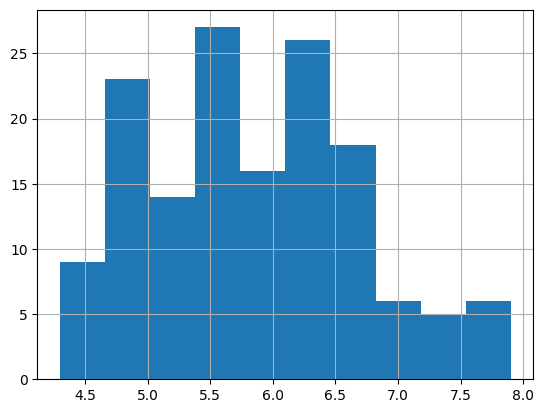

In [21]:
#histograms
df['sepallength'].hist()

<Axes: >

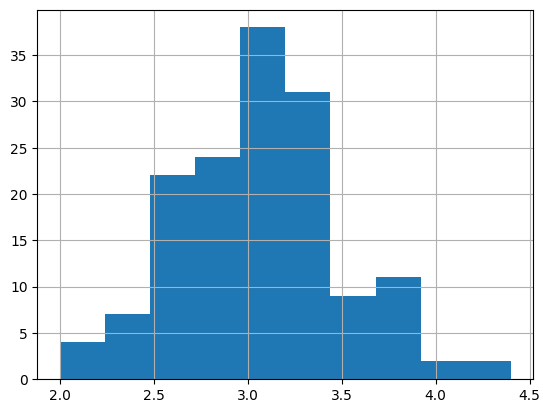

In [22]:
df['sepalwidth'].hist()

<Axes: >

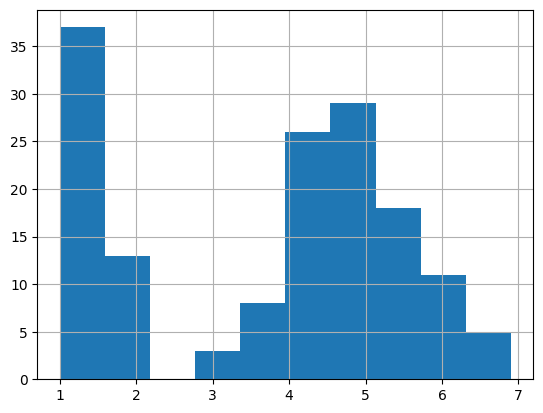

In [23]:
df['petallength'].hist()

<Axes: >

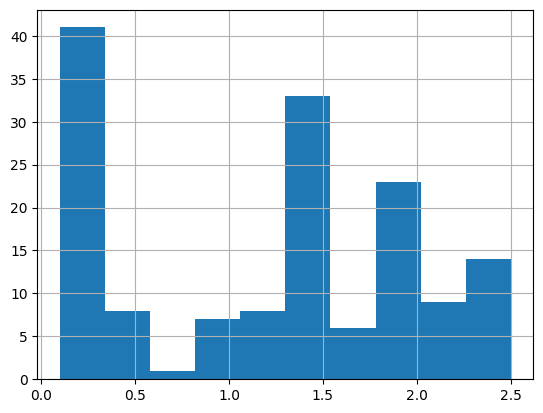

In [24]:
df['petalwidth'].hist()

In [27]:
colors=['red','blue','green']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

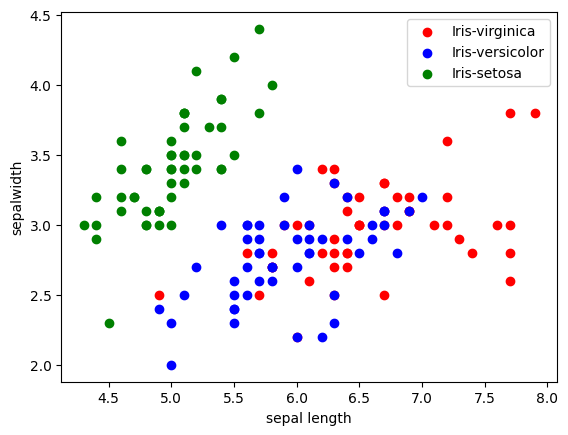

In [28]:
for i in range(3):
    x=df[df['class']==species[i]]
    plt.scatter(x['sepallength'],x['sepalwidth'],c=colors[i],label=species[i])
plt.xlabel("sepal length")
plt.ylabel("sepalwidth")
plt.legend()


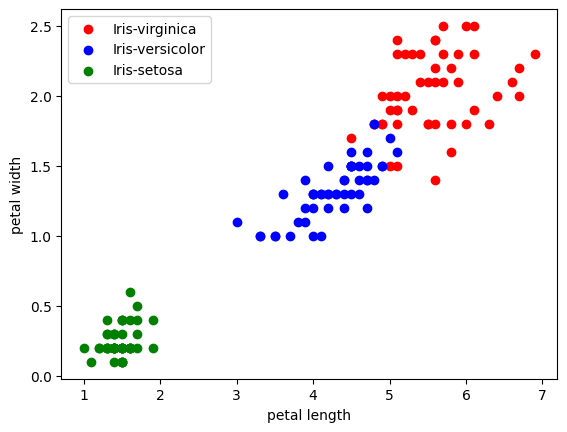

In [29]:
for i in range(3):
    x=df[df['class']==species[i]]
    plt.scatter(x['petallength'],x['petalwidth'],c=colors[i],label=species[i])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()

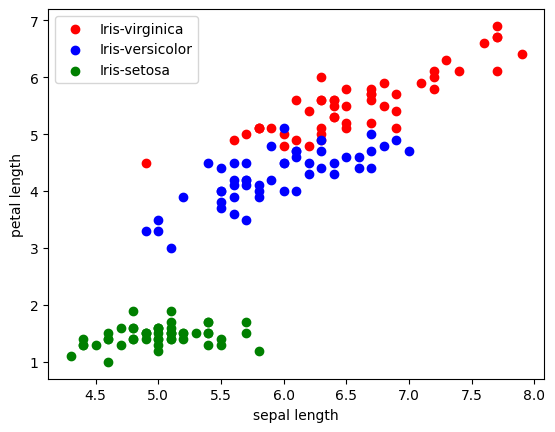

In [31]:
for i in range(3):
    x=df[df['class']==species[i]]
    plt.scatter(x['sepallength'],x['petallength'],c=colors[i],label=species[i])
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend()

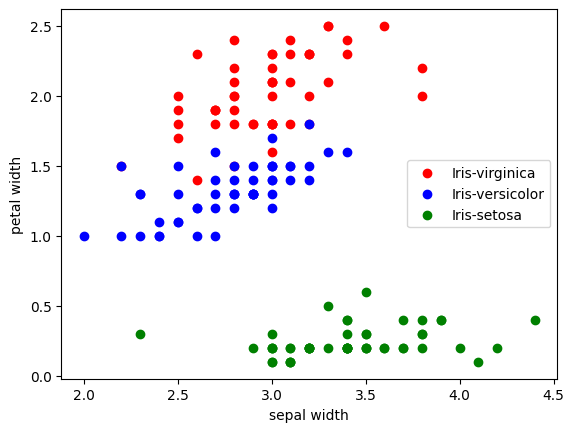

In [33]:
for i in range(3):
    x=df[df['class']==species[i]]
    plt.scatter(x['sepalwidth'],x['petalwidth'],c=colors[i],label=species[i])
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.legend()

In [34]:
df.corr()

<ipython-input-34-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


<ipython-input-35-df3a9c704e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

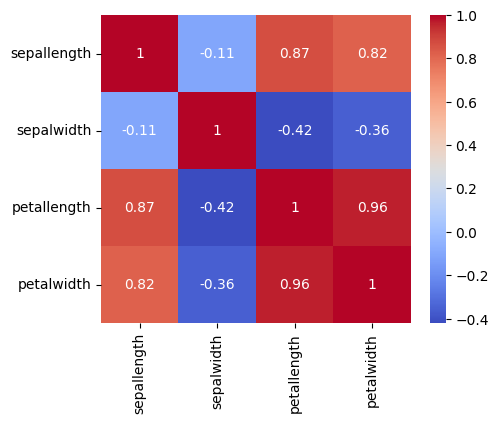

In [35]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [43]:
df['class']=le.fit_transform(df['class'])
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [47]:
from sklearn.model_selection import train_test_split
#train-70
#test-30
X=df.drop(columns=['class'])
Y=df['class']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [52]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [53]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 95.55555555555556


In [56]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [57]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [58]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


In [61]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [62]:
model.fit(x_train,y_train)

DecisionTreeClassifier()